# Fabric Defect Detection using image processing and OpenCV

## Required Packages

In [1]:
import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
%matplotlib inline
warnings.filterwarnings('ignore')

## Function to detect defects using segmentation approach
>   Here we are going to detect the anomalies in given fabric images using segmentation approach and localize the defect and mask the defected region.

>  Segmentation is used to divide the image into subregions, and then using computer vision algorithms to localise and identify the defected regions.

   -  To detect defects in plain woven fabrics, we segment the regions of interest (ROI) from defected images.

   -  The processing is done by using images in grayscale mode, and an image enhancement technique is applied to highlight the regions with defects. 

   - To further enhance the accuracy and to reduce the algorithm complexity, the noise is removed by applying the low-pass filtering which highlights the defected regions. 

   - The defected regions are then segmented with edge detection based on first-order derivatives. 


In [2]:
def defect_detect(image):

    img = image.copy()
    detection = ""

    # Convert image to hsv format
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h = hsv [:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,2]

   
    # Blur the image
    blr = cv2.blur(v,(15,15))
    
    # Noise filtering from the image
    dst = cv2.fastNlMeansDenoising(blr,None,10,7,21)
    
    # Applying image segmentation using cv2.threshold()
    _,binary = cv2.threshold(dst,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # Defining kernel for adjusting the size of convolutions
    kernel = np.ones((5,5),np.uint8)
    
    # Applying morphological image processing operations.
    erosion = cv2.erode(binary,kernel,iterations = 1)
    dilation = cv2.dilate(binary,kernel,iterations = 1)
    
    # Detecting defect in fabric based on dialation value and drawing contour over the defects
    if (dilation==0).sum() >1:
            detection = "Defective Fabric"
            contours,_ = cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            for i in contours:
                if cv2.contourArea(i) < 261121.0:
                    cv2.drawContours(img,i,-1,(0,255,0),3)
    else:
                     detection = "Good Fabric"
    
    #Returning the processed images and output
    return image,hsv,v,blr,dst,binary,dilation,img,detection

## Plotting images

Defective Fabric


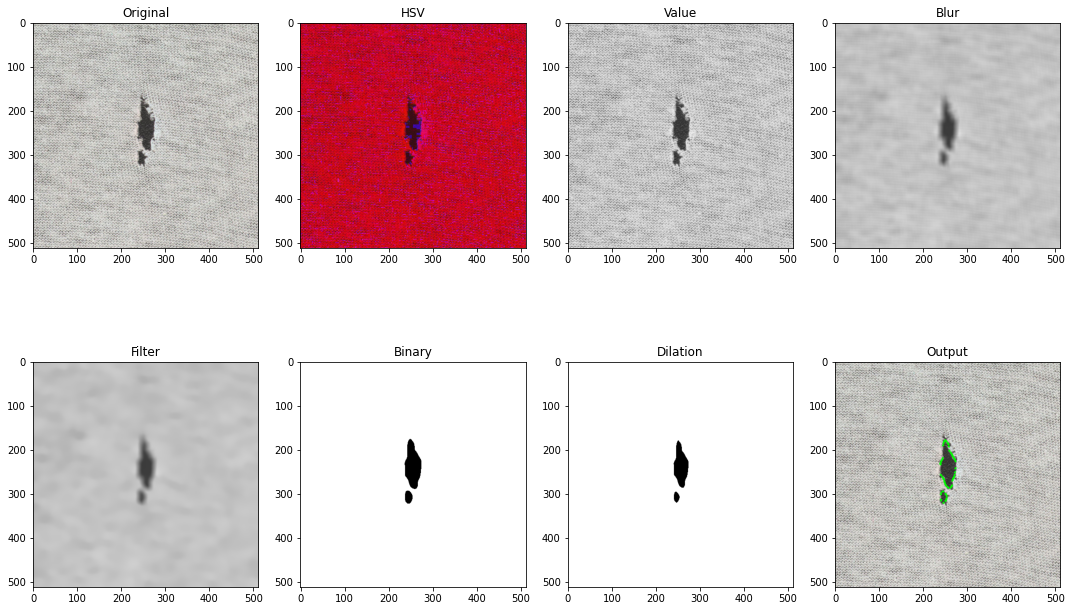

In [3]:
input_image = cv2.imread("/content/drive/MyDrive/Machine Learning/Task4_data/Fabric22.jpg")
image,hsv,v,blr,dst,binary,dilation,img,detection = defect_detect(input_image)
print(detection)

fig, ax = plt.subplots(2,4,figsize=(15,10))
ax[0,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0,0].set_title("Original")
ax[0,1].imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))
ax[0,1].set_title("HSV")
ax[0,2].imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
ax[0,2].set_title("Value")
ax[0,3].imshow(cv2.cvtColor(blr, cv2.COLOR_BGR2RGB))
ax[0,3].set_title("Blur")
ax[1,0].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
ax[1,0].set_title("Filter")
ax[1,1].imshow(binary,cmap='gray')
ax[1,1].set_title("Binary")
ax[1,2].imshow(dilation,cmap='gray')
ax[1,2].set_title("Dilation")
ax[1,3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1,3].set_title("Output")
fig.tight_layout()

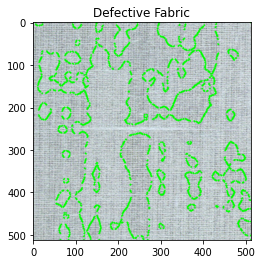

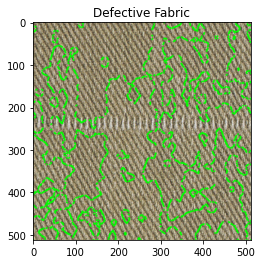

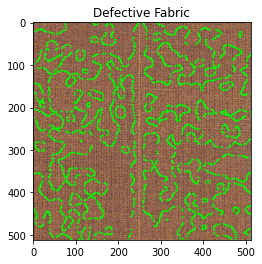

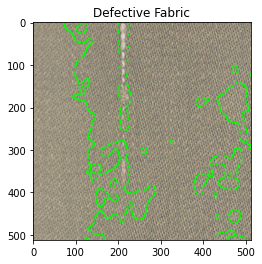

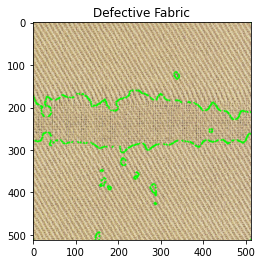

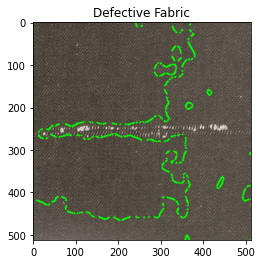

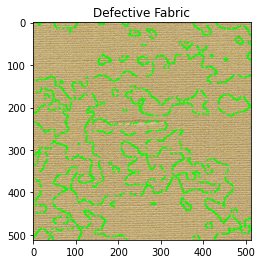

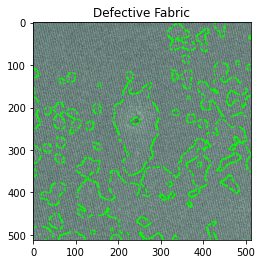

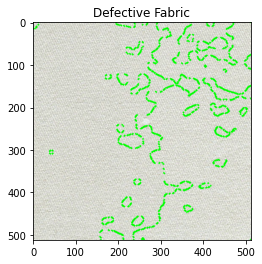

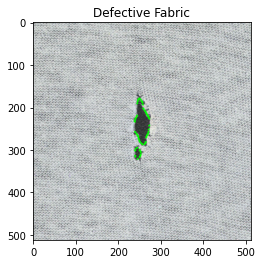

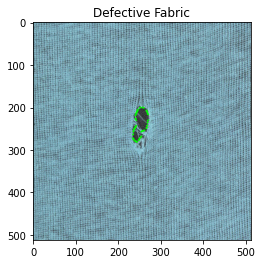

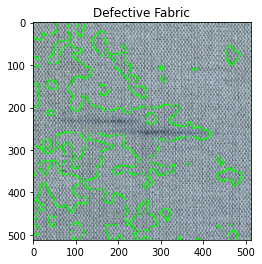

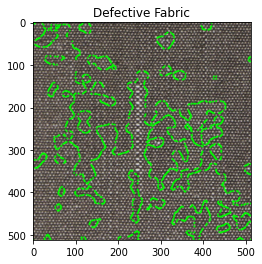

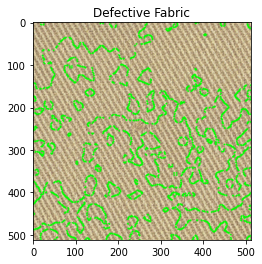

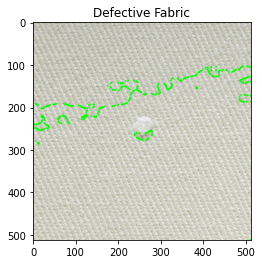

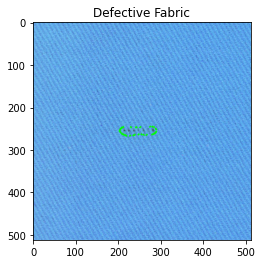

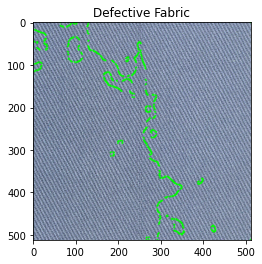

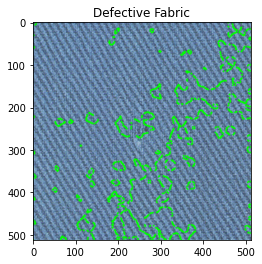

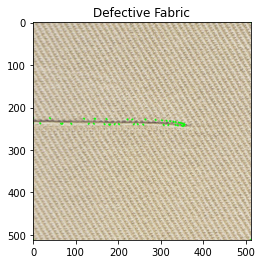

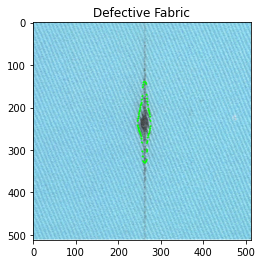

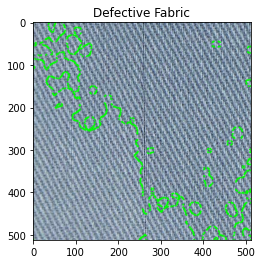

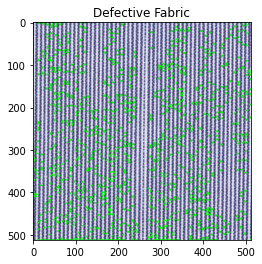

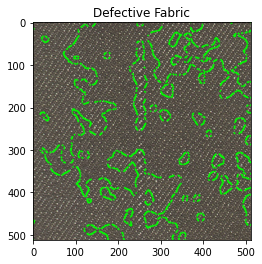

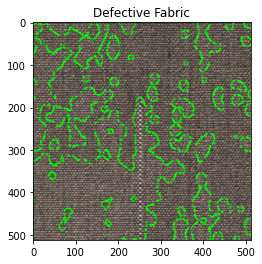

In [4]:
st = "/content/drive/MyDrive/Machine Learning/Task4_data/Fabric{n}.jpg"

images = [cv2.imread(file) for file in glob.glob('/content/drive/MyDrive/Machine Learning/Task4_data/*.jpg')]
for im in images: 
  image,hsv,v,blr,dst,binary,dilation,img,detection = defect_detect(im)
  plt.figure() 
  plt.imshow(img)
  plt.title(detection)

Made by [Saharsh Laud](https://github.com/SaharshLaud)